***IT SUPPORT TICKET PREDICTION*** 

*IMPORTS*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

#sci-kit
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

#nltk
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

#wordcloud
from wordcloud import WordCloud

#flask
from flask import Flask, render_template, request
print("Packages imported successfully!")

Packages imported successfully!


*LOADING DATA*

In [2]:
#load data
path = 'Datasets/tickets.csv'
tickets = pd.read_csv(path)
print("Data loaded successfully!")

Data loaded successfully!


*EXPLORATORY DATA ANALYSIS*

In [3]:
#how our data looks
tickets.head()

,Description,Category
0,hi since recruiter lead permission approve req...,D
1,re expire days hi ask help update passwords co...,D
2,verification warning hi has got attached pleas...,D
3,please dear looks blacklisted receiving mails ...,D
4,dear modules report report cost thank much reg...,D


In [4]:
#dimensions of data
tickets.shape

(3000, 2)

In [5]:
#value count of each category
tickets['Category'].value_counts()

D    600
E    600
A    600
B    600
C    600
Name: Category, dtype: int64

In [6]:
#describing our data
tickets.describe()

,Description,Category
count,3000,3000
unique,3000,5
top,hi since recruiter lead permission approve req...,D
freq,1,600


In [7]:
#checking data-type of each attribute
tickets.dtypes

Description    object
Category       object
dtype: object

In [8]:
#checking values for our target variable
tickets['Category'].unique()

array(['D', 'E', 'A', 'B', 'C'], dtype=object)

In [9]:
#setting column to predict
column_to_predict = 'category'

In [10]:
#checking for NA value in our data
tickets.isnull().values.any()

False

In [11]:
#distribution of target value
tickets['Category'].value_counts()

D    600
E    600
A    600
B    600
C    600
Name: Category, dtype: int64

*DATA VISUALISATION*

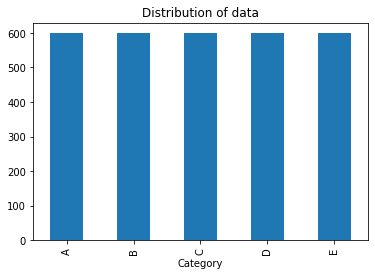

In [12]:
#visualizing data and the distribution of data
ax = tickets.groupby('Category').count().plot(kind='bar', title='Distribution of data', legend=False)
body, category  = list(tickets['Description']), list(tickets['Category'])

<AxesSubplot:xlabel='Category', ylabel='count'>

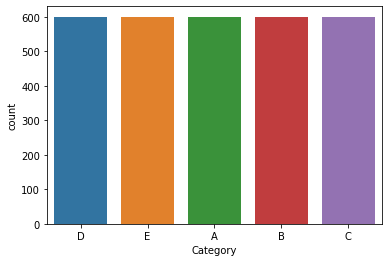

In [13]:
#visualization of target values in our data
sns.countplot(x='Category', data = tickets)

*DATA PREPROCESSING*

In [14]:
#converting the body of ticket to lower case
def lowering_case(data):
    print("Changing data to lower case...", end = "")
    data['Description'] = data['Description'].str.lower()
    print(" done!!")
    return data

In [15]:
#defining stopwords
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', 'thats', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves', 'thanks', 'thankyou', 'hello', 'please', 'monday', 'tuesday', 'wednessday', 'thursday', 'friday', 'saturday', 'sunday']
STOPWORDS = set(stopwordlist)
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'by',
 'can',
 'd',
 'did',
 'do',
 'does',
 'doing',
 'down',
 'during',
 'each',
 'few',
 'for',
 'friday',
 'from',
 'further',
 'had',
 'has',
 'have',
 'having',
 'he',
 'hello',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'it',
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'monday',
 'more',
 'most',
 'my',
 'myself',
 'now',
 'o',
 'of',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'own',
 'please',
 're',
 's',
 'same',
 'saturday',
 'she',
 'shes',
 'should',
 'shouldve',
 'so',
 'some',
 'such',
 'sunday',
 't',
 'than',
 'thanks',
 'thankyou',
 'that',
 'thatll',
 'thats',
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 'these',
 'they',
 'this',


In [16]:
#removing stopwords from data
def removing_stopword(data):
    print("Removing stopwords from data...", end = "")
    def cleaning_stopwords(text):
        return " ".join([word for word in str(text).split() if word not in STOPWORDS])
    data['Description'] = data['Description'].apply(lambda x: cleaning_stopwords(x))
    print(" done!!")
    return data

In [17]:
#removing punctuations
def removing_punctuations(data):
    print("Removing puncuations from data...", end = "")
    punctuations_list = string.punctuation
    def cleaning_punctuations(text):
        translator = str.maketrans('', '', punctuations_list)
        return text.translate(translator)
    data['Description'] = data['Description'].apply(lambda x: cleaning_punctuations(x))
    print(" done!!")
    return data

In [18]:
#removing repeating characeters
def removing_repeatingchars(data):
    print("Removing repeating characters...", end = "")
    def cleaning_repeating_chars(text):
        return re.sub(r'(.)1+', r'1', text)
    data['Description'] = data['Description'].apply(lambda x: cleaning_repeating_chars(x))
    print(" done!!")
    return data

In [19]:
#tokenizing
def tokenizing(data):
    print("Tokenizing data...", end = "")
    tokenizer = RegexpTokenizer('\s+', gaps = True)
    data['Description'] = data['Description'].apply(tokenizer.tokenize)
    print(" done!!")
    return data

In [20]:
#lemmatizing
def lemmatizing(data):
    print("Lemmatizing data...", end = "")
    lm = nltk.WordNetLemmatizer()
    def lemmatizer_on_text(data):
        data = [lm.lemmatize(word) for word in data]
        return data
    data['Decription'] = data['Description'].apply(lambda x: lemmatizer_on_text(x))
    print(" done!!")
    return data

In [21]:
#stemming
def stemming(data):
    print("Stemming data...", end = "")
    st = nltk.PorterStemmer()
    def stemming_on_text(data):
        data = [st.stem(word) for word in data]
        return data
    data['Description'] = data['Description'].apply(lambda x: stemming_on_text(x))
    print(" done!!")
    return data

In [22]:
#we will use ticket description i.e., the body of the ticket to predict it's category
dataset = tickets[['Description', 'Category']]

In [23]:
# preparing dataset to feed our model
def process_data(dataset):
    dataset = lowering_case(dataset)
    dataset = removing_repeatingchars(dataset)
    dataset = removing_punctuations(dataset)
    dataset = removing_stopword(dataset)
    dataset = tokenizing(dataset)
    dataset = lemmatizing(dataset)
    dataset = stemming(dataset)
    print("\nData ready to feed to the model.")
    return dataset

In [24]:
# preparing raw data to feed our model
def process_raw_data(dataset):
    print(dataset['Description'])
    dataset = lowering_case(dataset)
    print(dataset['Description'])
    dataset = removing_repeatingchars(dataset)
    print(dataset['Description'])
    dataset = removing_punctuations(dataset)
    print(dataset['Description'])
    dataset = removing_stopword(dataset)
    print(dataset['Description'])
    dataset = tokenizing(dataset)
    print(dataset['Description'])
    dataset = lemmatizing(dataset)
    print(dataset['Description'])
    dataset = stemming(dataset)
    print(dataset['Description'])
    print("\nData ready to feed to the model.")
    return dataset

In [25]:
#Natural language processing on dataset
dataset = process_data(dataset)

Changing data to lower case... done!!
Removing repeating characters... done!!
Removing puncuations from data... done!!
Removing stopwords from data... done!!
Tokenizing data... done!!
Lemmatizing data... done!!
Stemming data... done!!

Data ready to feed to the model.


*MODEL TRAINING AND VALIDATING*

In [26]:
# defining X and y
X = dataset.Description.astype('str')
y = dataset.Category

In [27]:
# spliting data into test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [28]:
# using vectorizer
vectoriser = TfidfVectorizer(ngram_range = (1, 2), max_features = 5000000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  37777


In [29]:
# vectorizing data
X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)

In [30]:
#defining a function to evaluate differnt models
def model_evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)

    sns.heatmap(cf_matrix, cmap = 'Blues',fmt = '')
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           A       0.92      0.28      0.43       118
           B       0.39      0.98      0.56       125
           C       0.82      0.68      0.74       130
           D       0.73      0.32      0.45       115
           E       0.80      0.66      0.73       112

    accuracy                           0.59       600
   macro avg       0.73      0.58      0.58       600
weighted avg       0.73      0.59      0.58       600



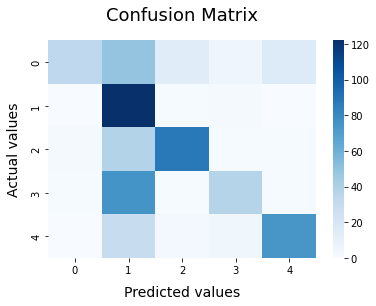

In [31]:
# using Bernoulli's Naive Bayes
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

              precision    recall  f1-score   support

           A       0.79      0.75      0.77       118
           B       0.81      0.86      0.83       125
           C       0.88      0.82      0.85       130
           D       0.73      0.79      0.76       115
           E       0.85      0.83      0.84       112

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600



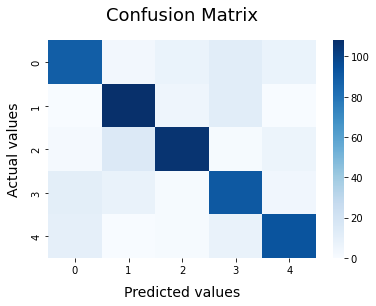

In [32]:
# using support vector machine
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

              precision    recall  f1-score   support

           A       0.76      0.77      0.77       118
           B       0.81      0.86      0.83       125
           C       0.89      0.78      0.84       130
           D       0.69      0.80      0.74       115
           E       0.88      0.80      0.84       112

    accuracy                           0.80       600
   macro avg       0.81      0.80      0.80       600
weighted avg       0.81      0.80      0.80       600



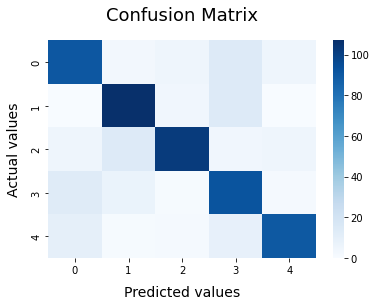

In [33]:
# using Logistic Regression
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

In [34]:
# selecting model with best accuracy
final_model = SVCmodel

*DEPLOYING MODEL*

In [35]:
#deploying our model
app = Flask(__name__)

@app.route("/", methods= ["GET", "POST"])
def home():
    return render_template("index.html")

@app.route("/sub", methods = ['POST'])
def result():
    if request.method == "POST":

        #receiving ticket
        title = request.form["title"]
        description = request.form["body"]
        
        #processing ticket data
        raw_data = pd.DataFrame([[description, title]])
        col_names = ["Description", "title"]
        raw_data.columns = col_names
        print("Ticket = ",raw_data)
        data = process_raw_data(raw_data)
        X = data.Description.astype(str)
        X = vectoriser.transform(X)

        y = final_model.predict(X)
        Category = y
        print("Ticket forwarded to destination", Category)
        
        #showing results
        return render_template("submit.html", show = Category)
 
if __name__ == "__main__":
    app.run()

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000 (Press CTRL+C to quit)
127.0.0.1 - - [05/May/2022 21:52:14] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/May/2022 21:52:14] "GET /static/style.css HTTP/1.1" 200 -
127.0.0.1 - - [05/May/2022 21:52:14] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [05/May/2022 22:06:52] "POST /sub HTTP/1.1" 200 -


Ticket =                     Description  title
0  laptop not working properly  hello
0    laptop not working properly
Name: Description, dtype: object
Changing data to lower case... done!!
0    laptop not working properly
Name: Description, dtype: object
Removing repeating characters... done!!
0    laptop not working properly
Name: Description, dtype: object
Removing puncuations from data... done!!
0    laptop not working properly
Name: Description, dtype: object
Removing stopwords from data... done!!
0    laptop not working properly
Name: Description, dtype: object
Tokenizing data... done!!
0    [laptop, not, working, properly]
Name: Description, dtype: object
Lemmatizing data... done!!
0    [laptop, not, working, properly]
Name: Description, dtype: object
Stemming data... done!!
0    [laptop, not, work, properli]
Name: Description, dtype: object

Data ready to feed to the model.
Ticket forwarded to destination ['E']


127.0.0.1 - - [05/May/2022 22:06:53] "GET /static/style.css HTTP/1.1" 304 -
127.0.0.1 - - [05/May/2022 22:07:09] "POST /sub HTTP/1.1" 200 -


Ticket =             Description  title
0  wifi password reset  hello
0    wifi password reset
Name: Description, dtype: object
Changing data to lower case... done!!
0    wifi password reset
Name: Description, dtype: object
Removing repeating characters... done!!
0    wifi password reset
Name: Description, dtype: object
Removing puncuations from data... done!!
0    wifi password reset
Name: Description, dtype: object
Removing stopwords from data... done!!
0    wifi password reset
Name: Description, dtype: object
Tokenizing data... done!!
0    [wifi, password, reset]
Name: Description, dtype: object
Lemmatizing data... done!!
0    [wifi, password, reset]
Name: Description, dtype: object
Stemming data... done!!
0    [wifi, password, reset]
Name: Description, dtype: object

Data ready to feed to the model.
Ticket forwarded to destination ['E']


127.0.0.1 - - [05/May/2022 22:07:09] "GET /static/style.css HTTP/1.1" 304 -
127.0.0.1 - - [05/May/2022 22:07:24] "POST /sub HTTP/1.1" 200 -


Ticket =            Description  title
0  moodle login issue  hello
0    moodle login issue
Name: Description, dtype: object
Changing data to lower case... done!!
0    moodle login issue
Name: Description, dtype: object
Removing repeating characters... done!!
0    moodle login issue
Name: Description, dtype: object
Removing puncuations from data... done!!
0    moodle login issue
Name: Description, dtype: object
Removing stopwords from data... done!!
0    moodle login issue
Name: Description, dtype: object
Tokenizing data... done!!
0    [moodle, login, issue]
Name: Description, dtype: object
Lemmatizing data... done!!
0    [moodle, login, issue]
Name: Description, dtype: object
Stemming data... done!!
0    [moodl, login, issu]
Name: Description, dtype: object

Data ready to feed to the model.
Ticket forwarded to destination ['A']


127.0.0.1 - - [05/May/2022 22:07:24] "GET /static/style.css HTTP/1.1" 304 -
